In [36]:
from scipy.io import loadmat
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import random

import numpy as np

In [4]:
mat = loadmat('ex3data1.mat')

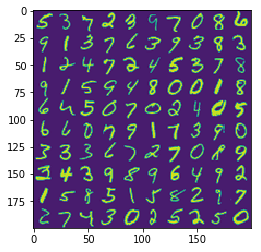

In [5]:
result = np.zeros((20 * 10, 20 * 10))

for i in range(10):
    for j in range(10):
        x = mat['X'][random.randint(0, 5000)]
        result[i*20:(i + 1) * 20 ,j*20:(j + 1)*20] = x.reshape((20, 20)).T
        
plt.imshow(result)

In [6]:
def cost_function(X, y, theta, l=1):
    m = np.size(y)
    h = 1 / (1 + np.exp(-X.dot(theta)))
    a = y.dot(np.log(h))
    b = (1 - y).dot(np.log(1 - h))
    c = theta[1:].dot(theta[1:])
    return (1 / m) * (-a - b) + l / (2 * m) * c


In [42]:
def one_vs_all(X, y, theta, val, l=1.0, method='BFGS'):
    y = np.array([(1 if val==y1 else 0) for y1 in y])
    return minimize(lambda theta: cost_function(X, y, theta, l), theta, method=method)

In [49]:
%%time
X = mat['X'] 
y = mat['y']
theta = np.zeros(np.shape(X)[1] + 1)
X = np.concatenate((np.ones((np.shape(X)[0], 1)), X), axis=1)

Theta = []
for i in range(1, 11):
    Theta.append(one_vs_all(X, y, theta, i).x)
Theta = np.array(Theta)

CPU times: user 40min 46s, sys: 15.2 s, total: 41min 1s
Wall time: 20min 30s


In [66]:
X = mat['X'] 
y = mat['y']
X = np.concatenate((np.ones((np.shape(X)[0], 1)), X), axis=1)

cnt = 0
for x, y1 in zip(X.dot(Theta.T), y):
    if list(x).index(max(x)) + 1 != y1[0]:
        cnt += 1
print((y.size - cnt) * 100 / y.size)

# Should be 94.9, Try other methods

94.46
